# Data analyse

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('01_framingham_clean.csv')
df.sample(5)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,TenYearCHD
2147,0,59,0,0.0,0.0,0,0,0,293.0,124.0,74.0,26.0,72.0,77.0,0,0,1,0,0
2521,1,53,1,20.0,0.0,0,1,0,216.0,110.0,79.0,25.0,75.0,74.0,1,0,0,0,0
3227,0,43,1,15.0,0.0,0,0,0,300.0,120.0,78.0,28.0,75.0,106.0,0,1,0,0,1
1468,1,50,1,60.0,0.0,0,1,0,340.0,134.0,95.0,30.0,85.0,86.0,1,0,0,0,0
595,1,44,0,0.0,0.0,0,0,0,198.0,119.0,82.0,28.0,75.0,66.0,1,0,0,0,0


<Figure size 640x480 with 0 Axes>

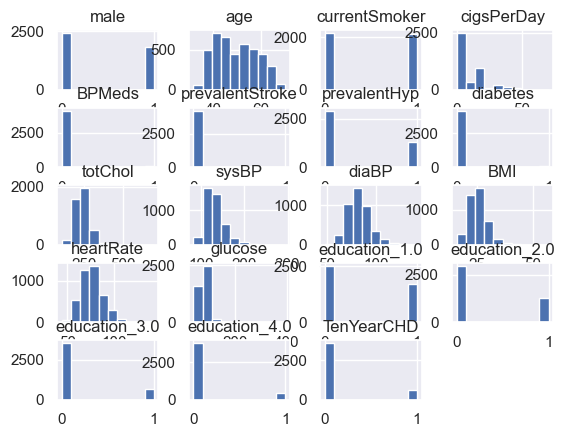

In [2]:
# Histogram of all Data: 
plt.figure()
sns.set_theme()
df.hist()
plt.show()

# Correlation with Target

In [3]:
# Split Data for later
y = df.iloc[:,-1]
X = df.iloc[:,:-1]

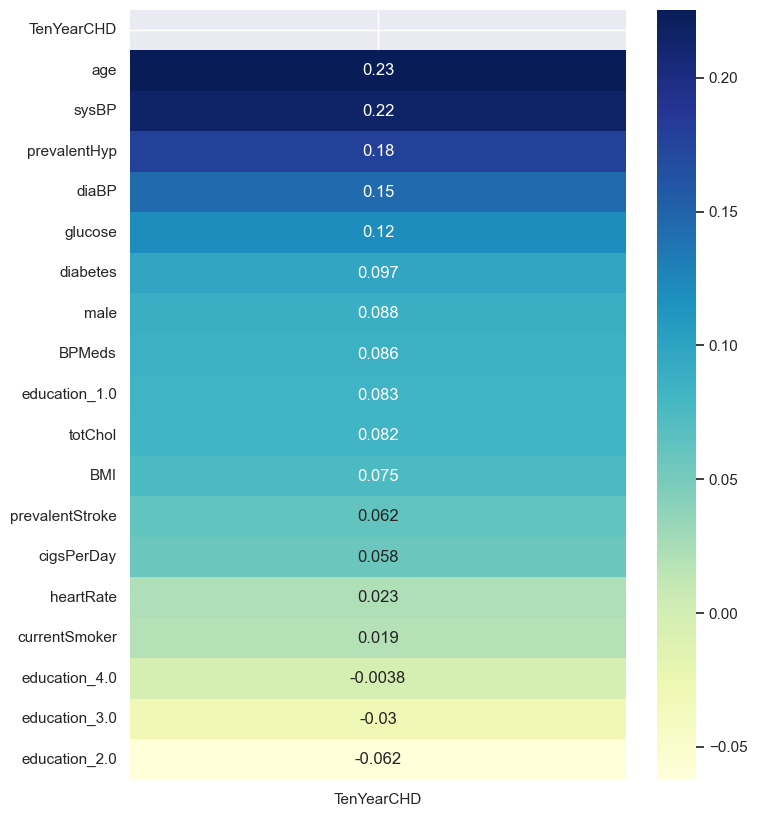

In [4]:
correlation_target = df.corr()[['TenYearCHD']].sort_values(by = 'TenYearCHD', ascending=False)
correlation_target = correlation_target[correlation_target < 1]

plt.figure(figsize=(8,10))
sns.heatmap(correlation_target, annot= True, cmap= "YlGnBu", vmax = correlation_target.max(), vmin = correlation_target.min())
plt.show()

In [5]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,0.494104,9.005896,0.029245,0.005896,0.310613,0.025708,236.703066,132.354599,82.897759,25.802830,75.879009,81.966981,0.405660,0.295519,0.162500,0.111557,0.151887
std,0.495027,8.572942,0.500024,11.881610,0.168513,0.076569,0.462799,0.158280,44.327533,22.033300,11.910394,4.084308,12.023930,22.831751,0.491077,0.456329,0.368952,0.314857,0.358953
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,16.000000,44.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.000000,68.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.000000,75.000000,80.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.000000,83.000000,85.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,57.000000,143.000000,394.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Oddratios: 
from scipy.stats import fisher_exact
from sklearn.metrics import confusion_matrix

print("Cleaned Dataseet: ")
for nr, i in enumerate(X.columns):
    try:
        cm = confusion_matrix(df[i].round(),df['TenYearCHD'], labels=[0, 1])
        OR_ratio, p_value = fisher_exact(cm, alternative='two-sided')
        if p_value !=1:
            print(i, '\n OR: ', OR_ratio, '\n  P-Value: ', p_value)
    except: 
        pass

Cleaned Dataseet: 
male 
 OR:  1.63485065579191 
  P-Value:  1.0698654843145102e-08
currentSmoker 
 OR:  1.1144928118076871 
  P-Value:  0.21466454158982817
cigsPerDay 
 OR:  0.6879957127545552 
  P-Value:  0.4781579566783347
BPMeds 
 OR:  2.8778397170772645 
  P-Value:  3.7555210603897973e-07
prevalentStroke 
 OR:  4.4461746784021665 
  P-Value:  0.0005285851881555316
prevalentHyp 
 OR:  2.674373040752351 
  P-Value:  5.783325997739487e-29
diabetes 
 OR:  3.3851617237738747 
  P-Value:  3.094174211010558e-08
education_1.0 
 OR:  1.5838947276875013 
  P-Value:  9.91216408386532e-08
education_2.0 
 OR:  0.6658940987698342 
  P-Value:  4.3636860183360034e-05
education_3.0 
 OR:  0.7887334059541052 
  P-Value:  0.0555910088193515
education_4.0 
 OR:  0.9662288930581614 
  P-Value:  0.8386786220598823


# Distribution of Values



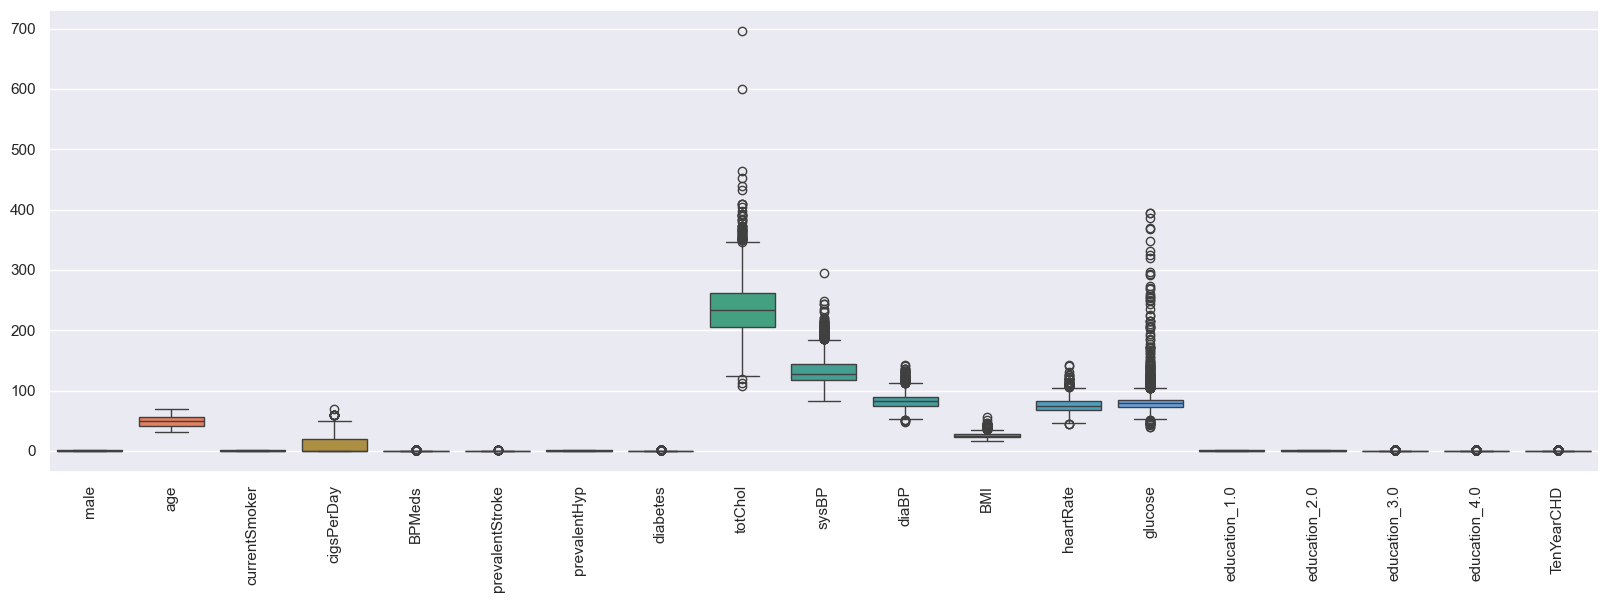

In [7]:
plt.figure(figsize=(20, 6))
# normalized_df=(df-df.min())/(df.max()-df.min())
sns.boxplot(df)

plt.xticks(rotation=90)
plt.show()

# Data imbalance

In [8]:
sizes = df['TenYearCHD'].value_counts()
print('Size of no CVD Risk',np.round(100/sizes.sum()*sizes[0],2),'%')
print('Size of no CVD Risk',np.round(100/sizes.sum()*sizes[1],2),'%')

Size of no CVD Risk 84.81 %
Size of no CVD Risk 15.19 %


In [9]:
# Smote:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
df_smote = pd.concat([pd.DataFrame(X_resampled, columns=X_train.columns), pd.Series(y_resampled, name=y_train.name)], axis=1).round()
df_test = pd.concat([pd.DataFrame(X_test, columns=X_test.columns), pd.Series(y_test, name=y_test.name)], axis=1).round()

df_smote.to_csv("02_framingham_smote_train.csv", index= False)
df_test.to_csv("02_framingham_test.csv", index= False)

# for col in df2.columns:
#     print(col, (df2[col]%1).value_counts().shape)

sizes = df_smote['TenYearCHD'].value_counts()
print(sizes)
print('Size of no CVD Risk',np.round(100/sizes.sum()*sizes[0],2),'%')
print('Size of no CVD Risk',np.round(100/sizes.sum()*sizes[1],2),'%')

TenYearCHD
0    2871
1    2871
Name: count, dtype: int64
Size of no CVD Risk 50.0 %
Size of no CVD Risk 50.0 %


In [10]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# oversample = RandomUnderSampler(sampling_strategy='minority')    
undersample = RandomUnderSampler(sampling_strategy=1)
X_under, y_under = undersample.fit_resample(X_train, y_train)

df_under = pd.concat([pd.DataFrame(X_under, columns=X_test.columns), pd.Series(y_under, name=y_test.name)], axis=1).round()

df_under.to_csv("02_framingham_undersampling_train.csv", index= False)

sizes = df_under['TenYearCHD'].value_counts()
print(sizes)
print('Size of no CVD Risk',np.round(100/sizes.sum()*sizes[0],2),'%')
print('Size of no CVD Risk',np.round(100/sizes.sum()*sizes[1],2),'%')

TenYearCHD
0    521
1    521
Name: count, dtype: int64
Size of no CVD Risk 50.0 %
Size of no CVD Risk 50.0 %


In [11]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# oversample = RandomOverSampler(sampling_strategy='minority')    
oversample = RandomOverSampler(sampling_strategy=1)
X_over, y_over = oversample.fit_resample(X_train, y_train)

df_over = pd.concat([pd.DataFrame(X_over, columns=X_test.columns), pd.Series(y_over, name=y_test.name)], axis=1).round()

df_over.to_csv("02_framingham_oversampling_train.csv", index= False)

# for col in df2.columns:
#     print(col, (df2[col]%1).value_counts().shape)

sizes = df_over['TenYearCHD'].value_counts()
print(sizes)
print('Size of no CVD Risk',np.round(100/sizes.sum()*sizes[0],2),'%')
print('Size of no CVD Risk',np.round(100/sizes.sum()*sizes[1],2),'%')

TenYearCHD
0    2871
1    2871
Name: count, dtype: int64
Size of no CVD Risk 50.0 %
Size of no CVD Risk 50.0 %


## Scaling with shifting Target

In [12]:
# Scaled between 0...1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
scaler.fit(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Split Data for later
X = X_scaled.copy()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

df_train = pd.concat([pd.DataFrame(X_train, columns=X_train.columns), pd.Series(y_train, name=y_train.name)], axis=1)
df_test = pd.concat([pd.DataFrame(X_test, columns=X_test.columns), pd.Series(y_test, name=y_test.name)], axis=1)
df = pd.concat([X, y], axis=1)

df_train.to_csv("02_framingham_scaled_train.csv", index= False)
df_test.to_csv("02_framingham_scaled_test.csv", index= False)

sizes = df['TenYearCHD'].value_counts()
print(sizes)
print('Size of no CVD Risk',np.round(100/sizes.sum()*sizes[0],2),'%')
print('Size of no CVD Risk',np.round(100/sizes.sum()*sizes[1],2),'%')

# Split Data for later
y_train = df_train.iloc[:,-1]
X_train = df_train.iloc[:,:-1]

TenYearCHD
0    3596
1     644
Name: count, dtype: int64
Size of no CVD Risk 84.81 %
Size of no CVD Risk 15.19 %


In [13]:
# Smote of scaled values
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
df_smote = pd.concat([pd.DataFrame(X_resampled, columns=X_train.columns), pd.Series(y_resampled, name=y_train.name)], axis=1)
df_test = pd.concat([pd.DataFrame(X_test, columns=X_test.columns), pd.Series(y_test, name=y_test.name)], axis=1)

df_smote.to_csv("02_framingham_scaled_smote_train.csv", index= False)

sizes = df_smote['TenYearCHD'].value_counts()
print(sizes)
print('Size of no CVD Risk',np.round(100/sizes.sum()*sizes[0],2),'%')
print('Size of no CVD Risk',np.round(100/sizes.sum()*sizes[1],2),'%')

TenYearCHD
0    2871
1    2871
Name: count, dtype: int64
Size of no CVD Risk 50.0 %
Size of no CVD Risk 50.0 %


In [14]:
# Undersampling with scaled values
from imblearn.under_sampling import RandomUnderSampler

# oversample = RandomUnderSampler(sampling_strategy='minority')    
undersample = RandomUnderSampler(sampling_strategy=1)
X_under, y_under = undersample.fit_resample(X_train, y_train)

df_under = pd.concat([pd.DataFrame(X_under, columns=X_test.columns), pd.Series(y_under, name=y_test.name)], axis=1)

df_under.to_csv("02_framingham_scaled_undersampling_train.csv", index= False)

sizes = df_under['TenYearCHD'].value_counts()
print(sizes)
print('Size of no CVD Risk',np.round(100/sizes.sum()*sizes[0],2),'%')
print('Size of no CVD Risk',np.round(100/sizes.sum()*sizes[1],2),'%')

TenYearCHD
0    521
1    521
Name: count, dtype: int64
Size of no CVD Risk 50.0 %
Size of no CVD Risk 50.0 %


In [15]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler

# oversample = RandomOverSampler(sampling_strategy='minority')    
oversample = RandomOverSampler(sampling_strategy=1)
X_over, y_over = oversample.fit_resample(X_train, y_train)

df_over = pd.concat([pd.DataFrame(X_over, columns=X_test.columns), pd.Series(y_over, name=y_test.name)], axis=1)

df_over.to_csv("02_framingham_oversampling_scaled_train.csv", index= False)

sizes = df_over['TenYearCHD'].value_counts()
print(sizes)
print('Size of no CVD Risk',np.round(100/sizes.sum()*sizes[0],2),'%')
print('Size of no CVD Risk',np.round(100/sizes.sum()*sizes[1],2),'%')

TenYearCHD
0    2871
1    2871
Name: count, dtype: int64
Size of no CVD Risk 50.0 %
Size of no CVD Risk 50.0 %


In [16]:
from scipy.stats import fisher_exact
from sklearn.metrics import confusion_matrix

print("scaled Dataset: ")
for i in X.columns:
    try:
        cm = confusion_matrix(df[i].round(),df['TenYearCHD'], labels=[0, 1])
        OR_ratio, p_value = fisher_exact(cm, alternative='two-sided')
        if p_value !=1:
            print(i, '\n OR: ', OR_ratio, '\n  P-Value: ', p_value)
    except: 
        print('Error: ',i)
        pass

scaled Dataset: 
age 
 OR:  1.4498476297619562 
  P-Value:  0.0006657055927898296
cigsPerDay 
 OR:  1.5176158450052446 
  P-Value:  0.01115780313436657
totChol 
 OR:  1.3861301952248146 
  P-Value:  0.003372518828490661
sysBP 
 OR:  1.8049012933968687 
  P-Value:  3.0460043853145496e-07
diaBP 
 OR:  1.9100043716582036 
  P-Value:  6.146138888676639e-09
BMI 
 OR:  1.4242837653478855 
  P-Value:  0.0013380642549010145
heartRate 
 OR:  1.0837736778469393 
  P-Value:  0.5104689424114747
glucose 
 OR:  1.3453144964041908 
  P-Value:  0.032745402460064146
Error:  education_2.0


# Odd - Ratio

In [17]:
# import numpy as np
# from sklearn.metrics import confusion_matrix
# from scipy.stats import fisher_exact

# df = df_over.copy()

# vals = df.age.value_counts().index.sort_values()

# binaries = np.empty(1, dtype=str)
# for i in df.columns:
#     if (df[i].max() == 1) & (df[i].min() == 0):
#         binaries = np.append(binaries, i)
# binaries = binaries[binaries !='']
# binaries = binaries[binaries !='TenYearCHD']

# # binaries = ['prevalentStroke']

# for topic in binaries:
#     orval = np.zeros([1, 2])
#     pval = np.zeros([1, 2])
#     # Calculate OD over all the features
#     avg = confusion_matrix(df[topic].round(),df['TenYearCHD'], labels=[0, 1])
#     odds_ratio, p_value = fisher_exact(avg, alternative='two-sided')

#     for nr, i in enumerate(vals):
#         df_age = df[df.age == i]
#         if df_age.shape[0] < 1:
#             continue
#         cm = confusion_matrix(df_age[topic].round(),df_age['TenYearCHD'], labels=[0, 1])
#         OR_calc, p_value_calc = fisher_exact(cm, alternative='two-sided')
#         if OR_calc != np.nan:
#             orval = np.append(orval, [[i,OR_calc]], axis = 0)
#         if p_value_calc != np.nan:
#             pval = np.append(pval, [[i,p_value_calc]], axis = 0)

#     if orval.size > 10:
#         plt.plot(orval[:,0], orval[:,1], color = 'blue', label = 'oddratio', linestyle='--', marker='o')
#         plt.plot(pval[:,0], pval[:,1], color = 'green', label = 'p-value', linestyle='--', marker='o')
#         plt.ylim(-1, 5)
#         plt.xlim(df.age.min(),df.age.max())
#         plt.xlabel('age')
#         plt.ylabel('odd ratio, p-value')
#         plt.title(f'{topic};  OR: {np.round(odds_ratio,2)}, P-Value: {np.round(p_value,4)}')
#         plt.axhline(1, color = 'red')
#         plt.legend()
#         plt.show()

# Linear Regression

In [18]:
df_train.columns

Index(['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'education_1.0',
       'education_2.0', 'education_3.0', 'education_4.0', 'TenYearCHD'],
      dtype='object')

slope [m]:  0.11694066784776741
intercept [b]:  -1.4960033227063797e-16


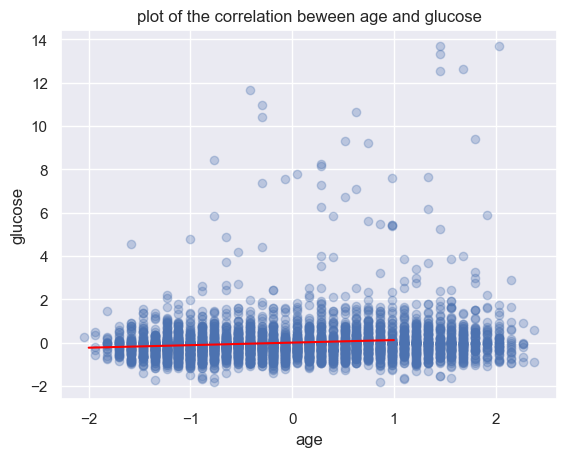

In [19]:
# Linear Regression between the numbers.
from sklearn.linear_model import LinearRegression
# ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
#        'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
#        'diaBP', 'BMI', 'heartRate', 'glucose', 'education_1.0',
#        'education_2.0', 'education_3.0', 'education_4.0', 'TenYearCHD'],

X = 'age'
y = 'glucose'
model = LinearRegression()

fitting = model.fit(df[[X]], df[y])
print('slope [m]: ',fitting.coef_[0])
print('intercept [b]: ',fitting.intercept_)

x = np.arange(df[X].min().astype(int),df[X].max().astype(int))

x = pd.DataFrame(x, columns = [X])
y_pred= model.predict(x)

plt.scatter(df[X], df[y], alpha = 0.3)
# print(y_pred, arr)

plt.plot(x, y_pred, color = 'red')
plt.ylabel(y)
plt.xlabel(X)
plt.title(f"plot of the correlation beween {X} and {y}")
plt.show()

In [20]:
# trying new Values: 
df['diffBP'] = df['sysBP']-df['diaBP']
df['multBP'] = df['sysBP']*df['diaBP']

Slope [m]:  0.11694066784776741
Intercept [b]:  -1.4960033227063797e-16


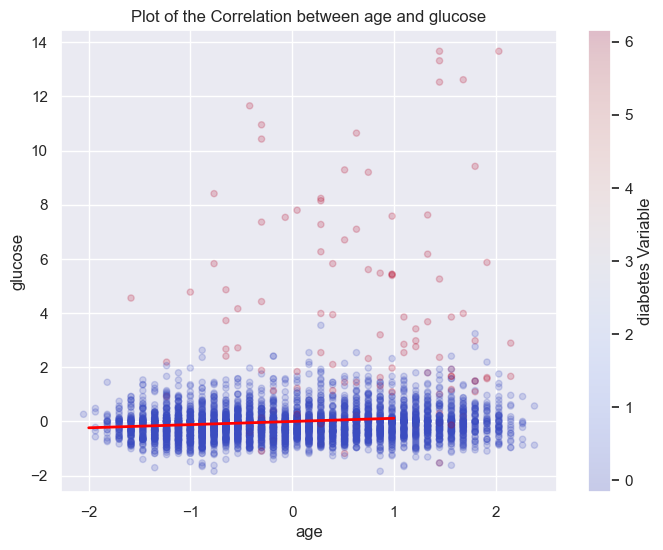

In [25]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# ['male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds',
#        'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
#        'diaBP', 'BMI', 'heartRate', 'glucose', 'education_1.0',
#        'education_2.0', 'education_3.0', 'education_4.0', 'TenYearCHD'],

X = 'age'
y = 'glucose'
target = 'diabetes'

model = LinearRegression()
fitting = model.fit(df[[X]], df[y])

print('Slope [m]: ', fitting.coef_[0])
print('Intercept [b]: ', fitting.intercept_)

x = np.arange(df[X].min().astype(int), df[X].max().astype(int))
x = pd.DataFrame(x, columns=[X])
y_pred = model.predict(x)

plt.figure(figsize=(8, 6))
plt.scatter(df[X], df[y], c=df[target], alpha=0.2, cmap='coolwarm', s = 20)
plt.plot(x, y_pred, color='red', linewidth=2)
plt.ylabel(y)
plt.xlabel(X)
plt.title(f"Plot of the Correlation between {X} and {y}")
plt.colorbar(label=f'{target} Variable')
plt.show()

In [ ]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(42)  # For reproducibility

# Define the odds ratios for each EDC exposure
odds_ratios = {
    'pcb': 1.28, # polychlorinated biphenyl  (OR=1.28; 95%CI: 1.17–1.39)
    'bpa': 1.19, #  bisphenol   (OR=1.19, 95% CI: 1.03–1.37)
    'organochlorine_pesticide': 1.12, # organo-chlorine pesticide  (OR=1.12, 95% CI: 1.00–1.24)
    'phthalate': 1.11, # (OR=1.11, 95% CI: 1.06–1.17)
    'testvalue' : 4
}

col = 'phthalate'

# Parameters
N = df.shape[0]  # Total population
OR = odds_ratios[col]  # Odds ratio
# Baselinerisk is the P(d|e)
bl = 0.1
# print('baselinerisk: ', bl)

# calculate baseline risk
ORU = bl / (1-bl)
ORE = OR * ORU

# More Risk when exposed:
p_d_e = ORE / (1+ORE)

print(col)
print('Oddratio: ', OR)
# print('risk by exposure: ', np.round(p_d_e, 2))

# RR = OR / ((1-bl)+bl * OR)                                                                                              
# print('Relative Risk: ', np.round(RR,2))

# exposed = 1
# bl = bl * exposed
# print('probability of disease when not exposured: ', bl)

# p_d_e = p_d_e * exposed
# print('probability of disease when exposured: ', p_d_e)

# Generate random values for both diseased and healthy groups
df[col] = 0
df.loc[df['cardio'] == 1, col] = np.random.choice([0, 1], size=(df['cardio'] == 1).sum(), p=[1-p_d_e, p_d_e])  # for cardio == 1
df.loc[df['cardio'] == 0, col] = np.random.choice([0, 1], size=(df['cardio'] == 0).sum(), p=[1-bl,       bl])  # for cardio == 0

# Exposed to the col
# exposed = 0.1
# df.loc[(df[col] == 1) & (df['cardio'] == 1), col] = np.random.choice([0, 1], size=((df[col] == 1) & (df['cardio'] == 1)).sum(), p=[1 - exposed, exposed])
# df.loc[(df[col] == 1) & (df['cardio'] == 0), col] = np.random.choice([0, 1], size=((df[col] == 1) & (df['cardio'] == 0)).sum(), p=[1 - exposed, exposed])

# Testing the accuracy of the algoritm: 

# calculatec oddratio of the calculated data, should match the oddratio of the input... 
cm = confusion_matrix(df[col],df['cardio'])
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print('TP(ED): ',TP, 'FP(ND): ', FP)
print('FN(EH): ',FN, 'TN(NH): ', TN)

OR_calc = (TP*TN)/(FP*FN) if TN != 0 and FN != 0 else np.nan
print('Oddratio calculated: ', np.round(OR_calc,2))
print('difference in Oddratio: ', np.round(OR_calc-OR,4))

RR_calc = (TP / (TP+FP)) / (FN / (FN+TN))
# print('Relative Risk calculated: ', np.round(RR_calc,2))
# print('Correlation: ',df.corr().abs()['cardio'][col])

sns.heatmap(df.corr().abs()[['cardio']].sort_values(by='cardio', ascending=False), cmap = 'flare', vmax = 0.4, annot = True)
plt.show()

# PCA Analyse
find pattern with ML

Explained variance per principal component: [0.1798709  0.1054488  0.08896658]
Total variance explained by selected components: 0.37428628341543335


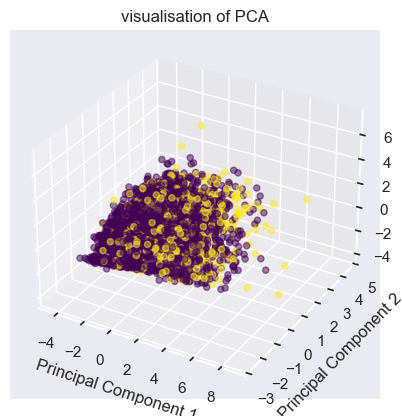

In [205]:
# calculate PCA
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler


# Standardize the data - this is crucial for PCA > already scaled!
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform()

# Choose the number of components based on the variance explained, for example, 95%
n_components = 3 # 2 or 3 X.shape[1]

# Initialize IncrementalPCA for large datasets
# pca = IncrementalPCA(n_components=n_components)

# Fit and transform the data
# X_pca = pca.fit_transform(X_scaled)

# # For in-memory PCA, simply use PCA()
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Explained variance ratio by each component
explained_variance = pca.explained_variance_ratio_
print("Explained variance per principal component:", explained_variance)

# Total variance explained
total_variance_explained = np.sum(explained_variance)
print("Total variance explained by selected components:", total_variance_explained)

# Scatter plot if reduced to 2 components
if X_pca.shape[1] == 2:
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y_train, cmap='viridis', alpha=0.5)
    plt.title('visualisation of PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# 3D Plot if reduced to 3 components
elif X_pca.shape[1] == 3:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # for label in unique_labels:
    #   ax.scatter(X_pca[y == label, 0.0], X_pca[y == label, 1.], X_pca[y == label, 2.],
    #         color=label_color_map[label], label=label, alpha=0.5)
    ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],c = y,  cmap='viridis', alpha=0.5)
    ax.set_zlabel('Principal Component 3')
    plt.title('visualisation of PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


Covered by Plot:  37.0 %


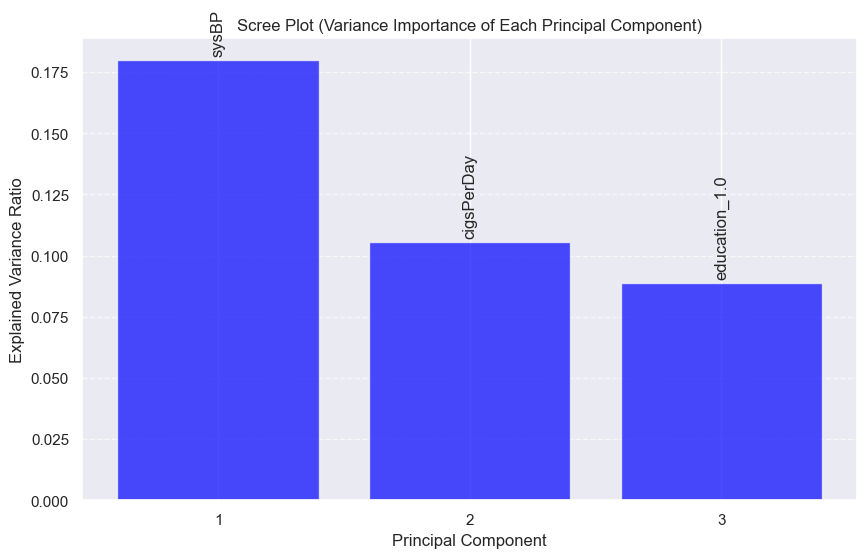

In [206]:
# Perform PCA with all components to examine explained variance
pca_full = PCA()
pca_full.fit(X_scaled)

print('Covered by Plot: ', np.round(np.sum(explained_variance)*100),'%')

# Scree Plot as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, color='blue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot (Variance Importance of Each Principal Component)')
plt.xticks(range(1, len(explained_variance) + 1))  # Ensures each bar has a label
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Annotate principal components with top contributing variable
components = pd.DataFrame(pca.components_, columns=X.columns)  # PCA component loadings
top_contributors = components.abs().idxmax(axis=1)  # Variable with max contribution per PC

# Annotate points with top contributing variable
for i, txt in enumerate(top_contributors):
    plt.annotate(f'{txt}', (i+1, explained_variance[i]), textcoords="offset points", xytext=(0,5), ha='center', rotation=90)

plt.show()


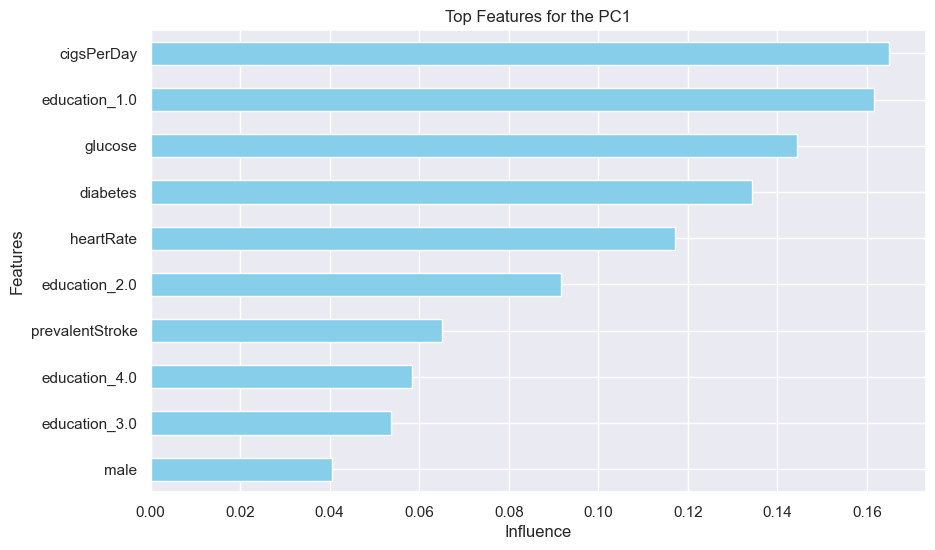

In [207]:
# Eigenvektoren und Eigenwerte abrufen
eigenvectors = pca.components_
eigenvalues = pca.explained_variance_

PC = 'PC1'

# Wichtigste Features für die erste Hauptkomponente
# Erstellen Sie ein DataFrame für die Koeffizienten
feature_importance = pd.DataFrame(eigenvectors.T, index=X.columns, columns=[f'PC{i+1}' for i in range(eigenvectors.shape[0])])
top_features_pc1 = feature_importance[PC].abs().sort_values(ascending=True)
# Optional: Visualisierung der wichtigsten Features
top_n = 10  # Anzahl der Top-Features, die angezeigt werden sollen
top_features_pc1[:top_n].plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title(f'Top Features for the {PC}')
plt.xlabel('Influence')
plt.ylabel('Features')
plt.show()

# UMAP

In [208]:
# !pip install umap-learn[plot]
# !pip install umap-learn
# !pip install dask
# !pip install numpy==2.0

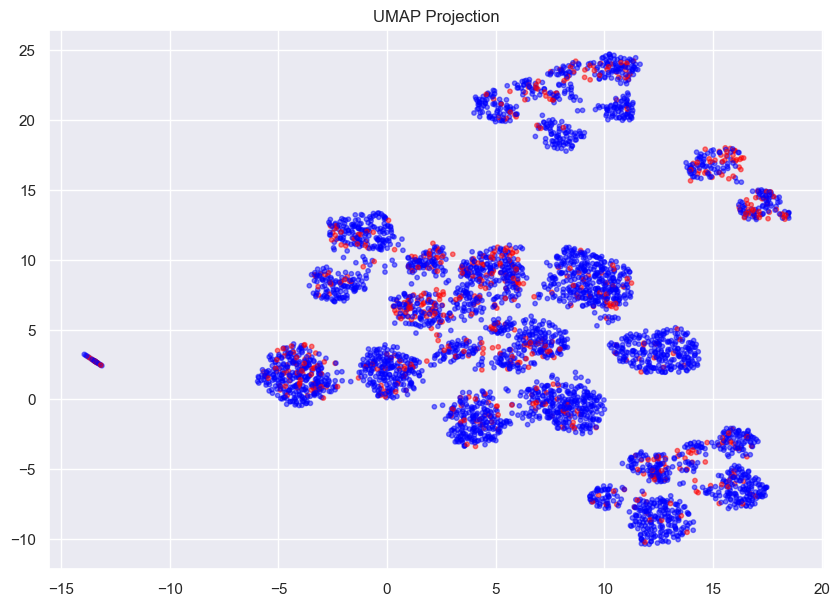

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns
import umap
import umap.plot

cmap = ListedColormap(['blue', 'red'])

plt.figure(figsize = (10,7))
u = umap.UMAP(n_neighbors=20, min_dist=0.8, metric='correlation').fit_transform(df)
plt.scatter(u[:,0], u[:,1], c = y, s = 10, alpha = 0.5, cmap = cmap)
plt.title('UMAP Projection')
plt.show()

In [210]:
# neighbors = 20
# min_dist = 10 # wil be devided by 10 but as a coutner must be a int
# metric = 'correlation'  # 'euclidean' manhattan chebyshev minkowski canberra braycurtis haversine mahalanobis wminkowski seuclidean cosine correlation
# for n in range(2, neighbors):
#   for d in range(0, min_dist):
#     plt.figure(figsize = (15,15))
#     # print(n,d)
#     mapper = umap.UMAP(n_neighbors=n, min_dist=d/10, metric=metric, init='random', random_state=42).fit(df)
#     umap.plot.points(mapper,labels=y.values.reshape(-1), color_key=['green', 'red'])
#     ax[n, d].set_title(f"n={n}, d={d/10:.1f}")
#     plt.show()